In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
url = 'https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv'
housing = pd.read_csv(url, sep=',')

In [9]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [12]:
# housing.head()
# Checking housing proximity columns for distinct values
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [14]:
# Describe options shows summary of all the neumerical fields
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [31]:
# Function for splitting data without using sklearn library

# def train_test_split(data, test_size):
#     shuffled_indices = np.random.permutation(len(data))
#     test_set_size = int(len(data)*test_size)
#     test_indices = shuffled_indices[:test_set_size]
#     train_indices = shuffled_indices[test_set_size:]
#     return data.iloc[test_indices], data.iloc[train_indices]

from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.20, random_state=42)

In [33]:
housing['income_cut'] = pd.cut(housing['median_income'], bins=[0.,1.5,3.0,4.5,6.0,np.inf], labels=list(range(0,5)))

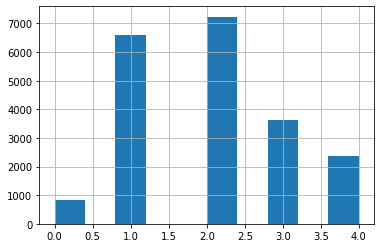

In [34]:
housing['income_cut'].hist()

In [37]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state = 42)
for train_index, test_index in split.split(housing, housing["income_cut"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [38]:
strat_train_set['income_cut'].value_counts(normalize=True)

2    0.350594
1    0.318859
3    0.176296
4    0.114462
0    0.039789
Name: income_cut, dtype: float64

In [39]:
housing["income_cut"].value_counts(normalize=True)

2    0.350581
1    0.318847
3    0.176308
4    0.114438
0    0.039826
Name: income_cut, dtype: float64

In [41]:
# As we can see clearly, stratified income_cut distribution, represent exact nature of the distribution, which is present original data set. 

strat_train_set.drop(labels=['income_cut'], axis = 1, inplace=True)
strat_test_set.drop(labels=['income_cut'], axis = 1, inplace=True)

In [42]:
# Setting aside a copy of stratified data set for exploration
df_explore = strat_test_set.copy()

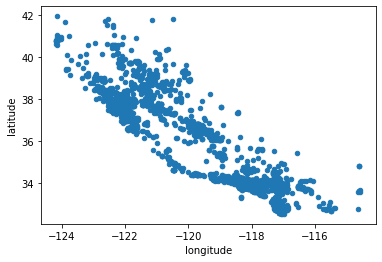

In [43]:
df_explore.plot(kind='scatter', x='longitude', y='latitude')

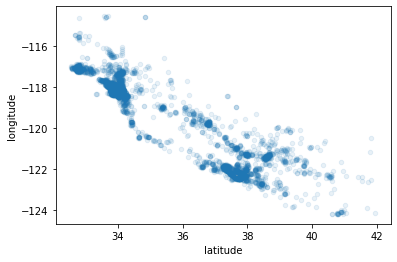

In [44]:
# setting alpha=0.1 will help in visualizing densly populated points in the data
df_explore.plot(kind='scatter', x='latitude', y='longitude', alpha=0.1)

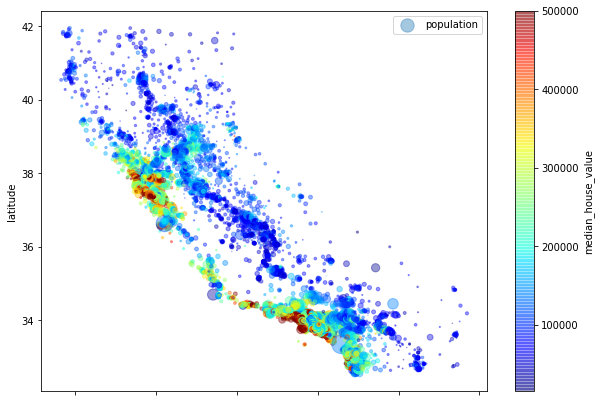

In [48]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, 
             label="population", 
             figsize=(10,7),
             c="median_house_value", 
             cmap=plt.get_cmap("jet"), 
             colorbar=True,)
plt.legend()

In [52]:
# We can calculate standard correlation coefficiant
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f54c56ea510>,
      dtype=object)

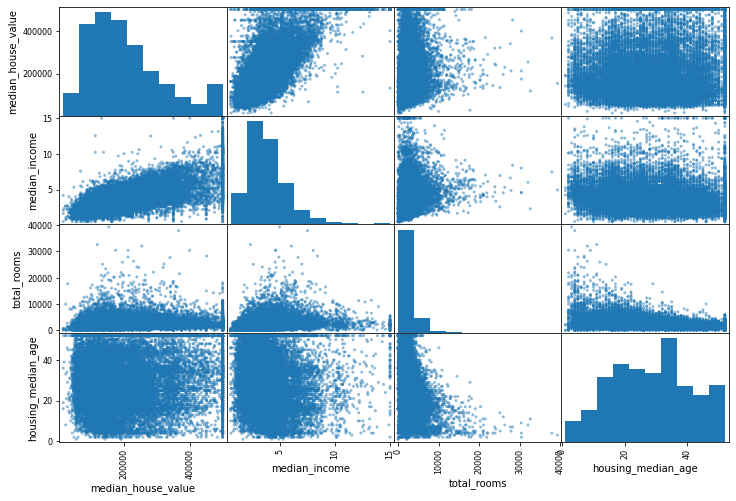

In [53]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms","housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

In [54]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

Preparing Data for Machine Learning

In [55]:
housing = strat_train_set.drop(labels=['median_house_value'], axis=1)
housing_labels = strat_train_set['median_house_value'].copy()